# 80. ID番号への変換

問題51で構築した学習データ中の単語にユニークなID番号を付与したい．学習データ中で最も頻出する単語に1，2番目に頻出する単語に2，……といった方法で，学習データ中で2回以上出現する単語にID番号を付与せよ．そして，与えられた単語列に対して，ID番号の列を返す関数を実装せよ．ただし，出現頻度が2回未満の単語のID番号はすべて0とせよ．

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/NewsAggregatorDataset'

/content/drive/MyDrive/NewsAggregatorDataset


In [3]:
#50 データの入手・整形
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読み込み #エラーが出るため、タブ区切り、ラベル名を指定する
df = pd.read_csv('newsCorpora.csv', sep="\t", names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"])

#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する
df = df[df['publisher'].isin(["Reuters", "Huffington Post", "Businessweek", "COntactmusic.com", "Daily Mail"])]

#抽出された事例をランダムに並び替える
df = df.sample(frac = 1, random_state = 42)

#抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する
train, test = train_test_split(df, test_size=0.2, random_state = 42)
test, valid = train_test_split(test, test_size=0.5, random_state = 42)

train.to_csv("train.txt", sep="\t")
test.to_csv("test.txt", sep="\t")
valid.to_csv("valid.txt", sep="\t")

print("train:",train["category"].value_counts())
print("test:",test["category"].value_counts())
print("valid:",valid["category"].value_counts())


train: b    4494
e    2425
t    1180
m     705
Name: category, dtype: int64
test: b    557
e    275
t    168
m    101
Name: category, dtype: int64
valid: b    574
e    270
t    164
m     93
Name: category, dtype: int64


In [4]:
#51
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV.fit(train['title'])
train_X = CV.transform(train['title'])
test_X = CV.transform(test['title'])
valid_X = CV.transform(valid['title'])
print(len(CV.vocabulary_))

train_x = pd.DataFrame(data= train_X.toarray(), columns= CV.get_feature_names_out())
test_x = pd.DataFrame(data= test_X.toarray(), columns= CV.get_feature_names_out())
valid_x = pd.DataFrame(data= valid_X.toarray(), columns= CV.get_feature_names_out())

train_x.to_csv('train.feature.txt', sep='\t', index=False)
test_x.to_csv('test.feature.txt', sep='\t', index=False)
valid_x.to_csv('valid.feature.txt', sep='\t', index=False)

df1 = pd.read_csv('train.feature.txt', sep="\t")
df1.head()

11823


,00,07,08,09,10,100,1000,10000,100000,100k,...,zillow,zimmerman,zip,zmapp,zombie,zombies,zone,zooey,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#80
import numpy as np

df2 = pd.DataFrame(data= df1.sum(), columns=['count'])
df2['word'] = df2.index
df2 = df2.sort_values('count', ascending=False)
df2.index = np.arange(0,len(df2))
df2['id'] = df2.index+1
df2['id'].where(df2['count'] >2, 0, inplace=True)


In [6]:
def idreturn(text):
  lis= []
  for word in text.split(' '):
    number= 0

    for i in range(len(df2)):
      if word == df2['word'][i]:
        number = df2['id'][i]

    lis.append(number)

  return lis

In [7]:
print(idreturn('I have a pen'))

[0, 93, 0, 0]


# 80'

In [8]:
# データのロード
import pandas as pd
import re
import numpy as np

# ファイル読み込み
file = './newsCorpora.csv'
data = pd.read_csv(file, encoding='utf-8', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
data = data.replace('"', "'")
# 特定のpublisherのみ抽出
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
data = data.loc[data['PUBLISHER'].isin(publishers), ['TITLE', 'CATEGORY']].reset_index(drop=True)

# 前処理
def preprocessing(text):
    text_clean = re.sub(r'[\"\'.,:;\(\)#\|\*\+\!\?#$%&/\]\[\{\}]', '', text)
    text_clean = re.sub('[0-9]+', '0', text_clean)
    text_clean = re.sub('\s-\s', ' ', text_clean)
    return text_clean

data['TITLE'] = data['TITLE'].apply(preprocessing)

# 学習用、検証用、評価用に分割する
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=64, stratify=data['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=64, stratify=valid_test['CATEGORY'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

# データ数の確認
print('学習データ')
print(train['CATEGORY'].value_counts())
print('検証データ')
print(valid['CATEGORY'].value_counts())
print('評価データ')
print(test['CATEGORY'].value_counts())

学習データ
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
検証データ
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
評価データ
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


In [9]:
# 単語の辞書を作成
from collections import Counter
words = []
for text in train['TITLE']:
    for word in text.rstrip().split():
        words.append(word)
c = Counter(words)
word2id = {}
for i, cnt in enumerate(c.most_common()):
    if cnt[1] > 1:
        word2id[cnt[0]] = i + 1
for i, cnt in enumerate(word2id.items()):
    if i >= 10:
        break
    print(cnt[0], cnt[1])

to 1
0 2
in 3
as 4
on 5
UPDATE 6
for 7
The 8
of 9
US 10


In [10]:
# 単語のID化
def tokenizer(text):
    words = text.rstrip().split()
    return [word2id.get(word, 0) for word in words]

sample = train.at[0, 'TITLE']
print(sample)
print(tokenizer(sample))

Justin Bieber Under Investigation For Attempted Robbery At Dave  Busters
[68, 76, 782, 1974, 21, 5054, 5055, 34, 1602, 0]


# 81. RNNによる予測

ID番号で表現された単語列x=(x1,x2,…,xT)
がある．ただし，T
は単語列の長さ，xt∈ℝV
は単語のID番号のone-hot表記である（V
は単語の総数である）．再帰型ニューラルネットワーク（RNN: Recurrent Neural Network）を用い，単語列x
からカテゴリy
を予測するモデルとして，次式を実装せよ


In [11]:
import torch
from torch import nn

VOCAB_SIZE = 4
EMB_SIZE = 3
emb = nn.Embedding(VOCAB_SIZE, EMB_SIZE)

words = torch.tensor([1, 3, 0, 2, 1, 2])
embed_words = emb(words)
print(embed_words)
print(words.shape, '->', embed_words.shape)

tensor([[ 0.4120,  1.2849, -1.6861],
        [ 0.0509, -0.5628, -0.5837],
        [-0.2609,  2.2830, -0.4645],
        [ 0.1713, -0.1071, -0.8030],
        [ 0.4120,  1.2849, -1.6861],
        [ 0.1713, -0.1071, -0.8030]], grad_fn=<EmbeddingBackward0>)
torch.Size([6]) -> torch.Size([6, 3])


In [12]:
!pip install torchinfo

In [13]:
# RNNの作成
# モデルの構築
import random
import torch
from torch import nn
import torch.utils.data as data
from torchinfo import summary

# 乱数のシードを設定
# parserなどで指定
seed = 1234

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(seed)

class RNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.rnn = nn.RNN(emb_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h0=None):
        x = self.emb(x)
        x, h = self.rnn(x, h0)
        x = x[:, -1, :]
        logits = self.fc(x)
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2  # 辞書のID数 + unknown + パディングID
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
NUM_LAYERS = 1

# モデルの定義
model = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
print(model)

RNN(
  (emb): Embedding(9725, 300, padding_idx=9724)
  (rnn): RNN(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)


In [14]:
x = torch.tensor([tokenizer(sample)], dtype=torch.int64)
print(x)
print(x.size())
print(nn.Softmax(dim=-1)(model(x)))

tensor([[  68,   76,  782, 1974,   21, 5054, 5055,   34, 1602,    0]])
torch.Size([1, 10])
tensor([[0.2589, 0.1883, 0.1050, 0.4477]], grad_fn=<SoftmaxBackward0>)


# 82. 確率的勾配降下法による学習

確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，問題81で構築したモデルを学習せよ．訓練データ上の損失と正解率，評価データ上の損失と正解率を表示しながらモデルを学習し，適当な基準（例えば10エポックなど）で終了させよ．

In [15]:
# ターゲットのテンソル化
category_dict = {'b': 0, 't': 1, 'e':2, 'm':3}
Y_train = torch.from_numpy(train['CATEGORY'].map(category_dict).values)
Y_valid = torch.from_numpy(valid['CATEGORY'].map(category_dict).values)
Y_test = torch.from_numpy(test['CATEGORY'].map(category_dict).values)
print(Y_train.size())
print(Y_train)

torch.Size([10672])
tensor([2, 0, 2,  ..., 0, 0, 0])


In [16]:
class NewsDataset(data.Dataset):
    """
    newsのDatasetクラス

    Attributes
    ----------------------------
    X : データフレーム
        単語ベクトルの平均をまとめたテンソル
    y : テンソル
        カテゴリをラベル化したテンソル
    phase : 'train' or 'val'
        学習か訓練かを設定する
    """
    def __init__(self, X, y, phase='train'):
        self.X = X['TITLE']
        self.y = y
        self.phase = phase

    def __len__(self):
        """全データサイズを返す"""
        return len(self.y)

    def __getitem__(self, idx):
        """idxに対応するテンソル形式のデータとラベルを取得"""
        inputs = torch.tensor(tokenizer(self.X[idx]))
        return inputs, self.y[idx]

train_dataset = NewsDataset(train, Y_train, phase='train')
valid_dataset = NewsDataset(valid, Y_valid, phase='val')
test_dataset = NewsDataset(test, Y_test, phase='val')
# 動作確認
idx = 0
print(train_dataset.__getitem__(idx)[0].size())
print(train_dataset.__getitem__(idx)[1])
print(valid_dataset.__getitem__(idx)[0].size())
print(valid_dataset.__getitem__(idx)[1])
print(test_dataset.__getitem__(idx)[0].size())
print(test_dataset.__getitem__(idx)[1])

torch.Size([10])
tensor(2)
torch.Size([11])
tensor(3)
torch.Size([13])
tensor(2)


In [17]:
# DataLoaderを作成
batch_size = 1

train_dataloader = data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True, worker_init_fn=seed_worker, generator=g)
valid_dataloader = data.DataLoader(
            valid_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g)
test_dataloader = data.DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g)

dataloaders_dict = {'train': train_dataloader,
                    'val': valid_dataloader,
                    'test': test_dataloader,
                   }

# 動作確認
batch_iter = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iter)
print(inputs.size())
print(labels)

torch.Size([1, 11])
tensor([2])


In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# 学習用の関数を定義
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []
    # epochのループ
    for epoch in range(num_epochs):
        print('Epoch {} / {}'.format(epoch + 1, num_epochs))
        print('--------------------------------------------')

        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() # 訓練モード
            else:
                net.eval() # 検証モード

            epoch_loss = 0.0 # epochの損失和
            epoch_corrects = 0 # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                optimizer.zero_grad() # optimizerを初期化

                # 順伝播計算(forward)
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels) # 損失を計算
                    _, preds = torch.max(outputs, 1) # ラベルを予想

                    # 訓練時は逆伝播
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イテレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率の表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc)

            print('{} Loss: {:.4f}, Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
    return train_loss, train_acc, valid_loss, valid_acc

# 学習を実行する

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 2
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Epoch 1 / 2
--------------------------------------------


100%|██████████| 10672/10672 [05:24<00:00, 32.87it/s]


train Loss: 1.0485, Acc: 0.5872


100%|██████████| 1334/1334 [00:00<00:00, 1572.56it/s]


val Loss: 1.0149, Acc: 0.6237
Epoch 2 / 2
--------------------------------------------


100%|██████████| 10672/10672 [06:45<00:00, 26.29it/s]


train Loss: 0.8288, Acc: 0.7099


100%|██████████| 1334/1334 [00:01<00:00, 1161.53it/s]

val Loss: 0.8516, Acc: 0.7241


# 83. ミニバッチ化・GPU上での学習

問題82のコードを改変し，B
事例ごとに損失・勾配を計算して学習を行えるようにせよ（B
の値は適当に選べ）．また，GPU上で学習を実行せよ

In [20]:
#TITLEと正解ラベルを含むbatchから、ID列(x)とラベル(labels)を返す関数を作る。→DataLoderの引数collate_fnに指定し、それを出力とする。
#バッチ内でタイトルの単語数が異なるため、最長単語数で揃える。
#padding_valueという引数は、パディングされた後の値。
#padding_value = PADDING_IDXとすることで、ID=9724(今回の場合)が割り当てられる。(PADDING_IDX=9724は、学習データで0以外のIDが割り当てられた単語数+1)
#https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_sequence.html
def collate_fn(batch):
    sequences = [x[0] for x in batch]
    labels = torch.LongTensor([x[1] for x in batch])
    x = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=PADDING_IDX)
    return x, labels

# DataLoaderを作成
batch_size = 64

train_dataloader = data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)
valid_dataloader = data.DataLoader(
            valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)
test_dataloader = data.DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, worker_init_fn=seed_worker, generator=g)

dataloaders_dict = {'train': train_dataloader,
                    'val': valid_dataloader,
                    'test': test_dataloader,
                   }

# 動作確認
#DataLoaderからiter & nextで中身を取り出してみる
#batch_size=64分の結果が出てくる
batch_iter = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iter)
print(inputs)
print(labels)

tensor([[4233, 4234, 4233,  ..., 9724, 9724, 9724],
        [ 965,   17, 5860,  ...,    5,   17, 9724],
        [   0,    0, 5623,  ..., 9724, 9724, 9724],
        ...,
        [2087, 9355, 1597,  ..., 9724, 9724, 9724],
        [   0,   33, 1548,  ..., 9724, 9724, 9724],
        [2761,   38,   41,  ..., 9724, 9724, 9724]])
tensor([2, 2, 2, 2, 2, 2, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 3, 0, 2, 2, 2,
        2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2,
        0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])


In [ ]:
# 学習用の関数を定義
#学習を実行し、訓練データと検証データ(or評価データ)の誤差と正解率を返す関数を作成
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # 初期設定
    # デバイスを指定
    # GPUを指定
    device = torch.device('cuda')

    # ネットワークをgpuへ
    net.to(device)

    #各試行の結果を保存するリストを作成(plt用)
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    # epochのループ
    #epoch=10指定
    for epoch in range(num_epochs):
        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() # 訓練モード
            else:
                net.eval() # 検証モード

            epoch_loss = 0.0 # epochの損失和
            epoch_corrects = 0 # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in dataloaders_dict[phase]:
                # GPUにおくる
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad() # optimizerを初期化

                # 順伝播計算(forward)
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels) # 損失を計算
                    _, preds = torch.max(outputs, 1) # ラベルを予想

                    # 訓練時は逆伝播
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イテレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率の表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            print(len(dataloaders_dict[phase].dataset))
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc.cpu())
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc.cpu())

        print('Epoch {} / {} (train) Loss: {:.4f}, Acc: {:.4f}, (val) Loss: {:.4f}, Acc: {:.4f}'.format(epoch + 1, num_epochs, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))
    return train_loss, train_acc, valid_loss, valid_acc

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

In [ ]:
#図示
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss, label='train')
ax[0].plot(epochs, valid_loss, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc, label='train')
ax[1].plot(epochs, valid_acc, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig83.png')
plt.show()

# 84. 単語ベクトルの導入

事前学習済みの単語ベクトル（例えば，Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル）で単語埋め込みemb(x)
を初期化し，学習せよ．

In [21]:
from gensim.models import KeyedVectors

# 学習済みモデルのロード
file = '/content/drive/MyDrive/shogi/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(file, binary=True)

# 学習済み単語ベクトルの取得
VOCAB_SIZE = len(set(word2id.values())) + 2
EMB_SIZE = 300
weights = np.zeros((VOCAB_SIZE, EMB_SIZE))
words_in_pretrained = 0
for i, word in enumerate(word2id.keys()):
    try:
        weights[i] = model[word]
        words_in_pretrained += 1
    except KeyError:
        weights[i] = np.random.normal(scale=0.1, size=(EMB_SIZE,))
weights = torch.from_numpy(weights.astype((np.float32)))

print(f'学習済みベクトル利用単語数: {words_in_pretrained} / {VOCAB_SIZE}')
print(weights.size())

学習済みベクトル利用単語数: 9042 / 9725
torch.Size([9725, 300])


In [22]:
def calc_acc(net, dataloader):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.eval()
    corrects = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = net(inputs)
            _, preds = torch.max(outputs, 1) # ラベルを予想
            corrects += torch.sum(preds == labels.data).cpu()
    return corrects / len(dataloader.dataset)

Epoch 1 / 10
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 39.25it/s]


train Loss: 1.2044, Acc: 0.4011


100%|██████████| 21/21 [00:00<00:00, 136.58it/s]


val Loss: 1.1615, Acc: 0.4475
Epoch 2 / 10
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 35.59it/s]


train Loss: 1.1611, Acc: 0.4370


100%|██████████| 21/21 [00:00<00:00, 90.73it/s]


val Loss: 1.1608, Acc: 0.4790
Epoch 3 / 10
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 35.95it/s]


train Loss: 1.1598, Acc: 0.4485


100%|██████████| 21/21 [00:00<00:00, 135.21it/s]


val Loss: 1.1590, Acc: 0.4685
Epoch 4 / 10
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 42.24it/s]


train Loss: 1.1582, Acc: 0.4514


100%|██████████| 21/21 [00:00<00:00, 140.23it/s]


val Loss: 1.1572, Acc: 0.4828
Epoch 5 / 10
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 38.74it/s]


train Loss: 1.1562, Acc: 0.4729


100%|██████████| 21/21 [00:00<00:00, 94.04it/s]


val Loss: 1.1545, Acc: 0.4663
Epoch 6 / 10
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 36.56it/s]


train Loss: 1.1526, Acc: 0.4835


100%|██████████| 21/21 [00:00<00:00, 142.36it/s]


val Loss: 1.1501, Acc: 0.4768
Epoch 7 / 10
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 48.52it/s]


train Loss: 1.1473, Acc: 0.4809


100%|██████████| 21/21 [00:00<00:00, 131.68it/s]


val Loss: 1.1420, Acc: 0.5007
Epoch 8 / 10
--------------------------------------------


100%|██████████| 167/167 [00:02<00:00, 58.59it/s]


train Loss: 1.1402, Acc: 0.4963


100%|██████████| 21/21 [00:00<00:00, 129.49it/s]


val Loss: 1.1332, Acc: 0.5060
Epoch 9 / 10
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 55.48it/s]


train Loss: 1.1189, Acc: 0.5230


100%|██████████| 21/21 [00:00<00:00, 88.42it/s]


val Loss: 1.0764, Acc: 0.5795
Epoch 10 / 10
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 51.25it/s]


train Loss: 1.0569, Acc: 0.5799


100%|██████████| 21/21 [00:00<00:00, 129.55it/s]


val Loss: 0.9904, Acc: 0.6394


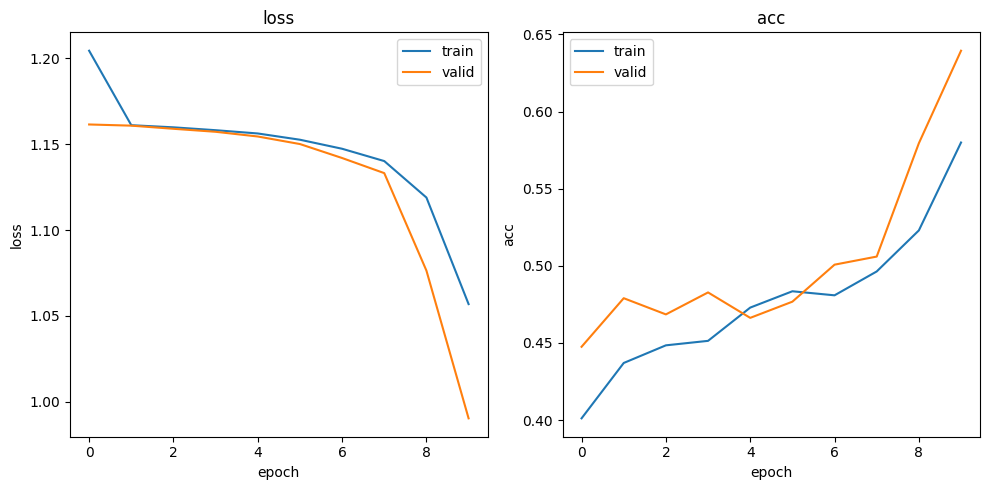

学習データの正解率: 0.6258
検証データの正解率: 0.6394
テストデータの正解率: 0.6372


In [23]:
class RNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, hidden_size, output_size, num_layers=1, emb_weights=None):
        super().__init__()
        if emb_weights != None:
            self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
        else:
            self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.rnn = nn.LSTM(emb_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h0=None):
        x = self.emb(x)
        x, h = self.rnn(x, h0)
        x = x[:, -1, :]
        logits = self.fc(x)
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2  # 辞書のID数 + unknown + パディングID
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
NUM_LAYERS = 1

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, weights)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
train_loss_weights, train_acc_weights, valid_loss_weights, valid_acc_weights = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss_weights, label='train')
ax[0].plot(epochs, valid_loss_weights, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc_weights, label='train')
ax[1].plot(epochs, valid_acc_weights, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig84.png')
plt.show()

acc_train = calc_acc(net, train_dataloader)
acc_valid = calc_acc(net, valid_dataloader)
acc_test = calc_acc(net, test_dataloader)
print('学習データの正解率: {:.4f}'.format(acc_train))
print('検証データの正解率: {:.4f}'.format(acc_valid))
print('テストデータの正解率: {:.4f}'.format(acc_test))

# 85. 双方向RNN・多層化

順方向と逆方向のRNNの両方を用いて入力テキストをエンコードし，モデルを学習せよ．

ただし，h→t∈ℝdh,h⃖ t∈ℝdh
はそれぞれ，順方向および逆方向のRNNで求めた時刻t
の隠れ状態ベクトル，RNN←−−−(x,h)
は入力x
と次時刻の隠れ状態h
から前状態を計算するRNNユニット，W(yh)∈ℝL×2dh
は隠れ状態ベクトルからカテゴリを予測するための行列，b(y)∈ℝL
はバイアス項である．また，[a;b]
はベクトルa
とb
の連結を表す。

さらに，双方向RNNを多層化して実験せよ．

Epoch 1 / 5
--------------------------------------------


100%|██████████| 167/167 [00:17<00:00,  9.40it/s]


train Loss: 1.1743, Acc: 0.4118


100%|██████████| 21/21 [00:00<00:00, 28.92it/s]


val Loss: 1.1641, Acc: 0.4213
Epoch 2 / 5
--------------------------------------------


100%|██████████| 167/167 [00:16<00:00, 10.24it/s]


train Loss: 1.1639, Acc: 0.4174


100%|██████████| 21/21 [00:00<00:00, 43.13it/s]


val Loss: 1.1734, Acc: 0.4213
Epoch 3 / 5
--------------------------------------------


100%|██████████| 167/167 [00:15<00:00, 10.69it/s]


train Loss: 1.1660, Acc: 0.4160


100%|██████████| 21/21 [00:00<00:00, 40.29it/s]


val Loss: 1.1614, Acc: 0.4498
Epoch 4 / 5
--------------------------------------------


100%|██████████| 167/167 [00:13<00:00, 12.59it/s]


train Loss: 1.1631, Acc: 0.4393


100%|██████████| 21/21 [00:00<00:00, 41.35it/s]


val Loss: 1.1614, Acc: 0.3958
Epoch 5 / 5
--------------------------------------------


100%|██████████| 167/167 [00:14<00:00, 11.50it/s]


train Loss: 1.1181, Acc: 0.5081


100%|██████████| 21/21 [00:00<00:00, 42.20it/s]


val Loss: 1.0390, Acc: 0.5997


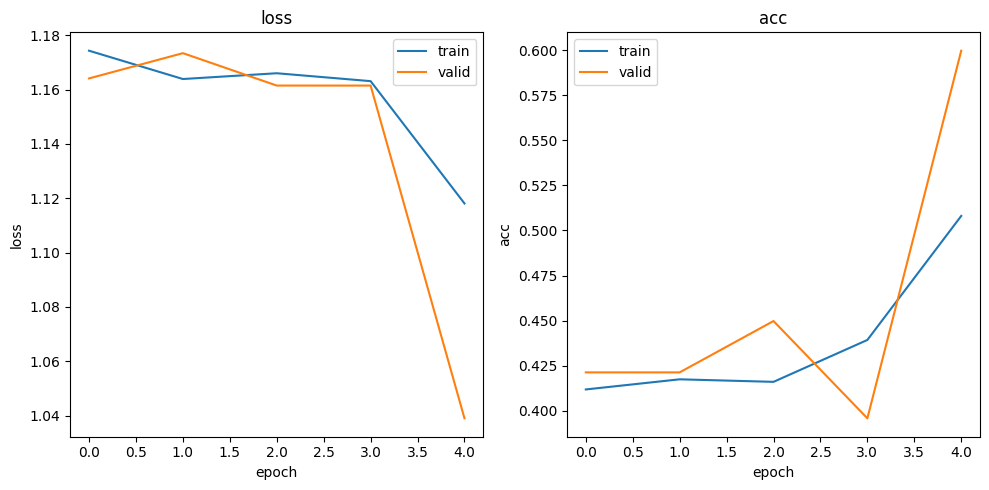

学習データの正解率: 0.6050
検証データの正解率: 0.5997
テストデータの正解率: 0.6087


In [24]:
class RNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, hidden_size, output_size, num_layers=3, emb_weights=None):
        super().__init__()
        if emb_weights != None:
            self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
        else:
            self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.rnn = nn.LSTM(emb_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x, h0=None):
        x = self.emb(x)
        x, h = self.rnn(x, h0)
        x = x[:, -1, :]
        logits = self.fc(x)
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2  # 辞書のID数 + unknown + パディングID
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
NUM_LAYERS = 3

# モデルの定義
net = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, weights)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

num_epochs = 5
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss, label='train')
ax[0].plot(epochs, valid_loss, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc, label='train')
ax[1].plot(epochs, valid_acc, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig85.png')
plt.show()

acc_train = calc_acc(net, train_dataloader)
acc_valid = calc_acc(net, valid_dataloader)
acc_test = calc_acc(net, test_dataloader)
print('学習データの正解率: {:.4f}'.format(acc_train))
print('検証データの正解率: {:.4f}'.format(acc_valid))
print('テストデータの正解率: {:.4f}'.format(acc_test))

# 86. 畳み込みニューラルネットワーク (CNN)

ID番号で表現された単語列x=(x1,x2,…,xT)
がある．ただし，T
は単語列の長さ，xt∈ℝV
は単語のID番号のone-hot表記である（V
は単語の総数である）．畳み込みニューラルネットワーク（CNN: Convolutional Neural Network）を用い，単語列x
からカテゴリy
を予測するモデルを実装せよ．

In [25]:
from torch.nn import functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, output_size, out_channels, kernel_heights, stride, padding, emb_weights=None):
        super().__init__()
        if emb_weights != None:  # 指定があれば埋め込み層の重みをemb_weightsで初期化
            self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
        else:
            self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.conv = nn.Conv2d(1, out_channels, (kernel_heights, emb_size), stride, (padding, 0))
        self.drop = nn.Dropout(0.4)
        self.fc = nn.Linear(out_channels, output_size)

    def forward(self, x):
        emb = self.emb(x).unsqueeze(1)
        conv = self.conv(emb)
        act = F.relu(conv.squeeze(3))
        max_pool = F.max_pool1d(act, act.size()[2])
        logits = self.fc(self.drop(max_pool.squeeze(2)))
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
OUT_CHANNELS = 100
KERNEL_HEIGHTS = 3
STRIDE = 1
PADDING = 1

# モデルの定義
model = CNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, OUT_CHANNELS, KERNEL_HEIGHTS, STRIDE, PADDING, emb_weights=weights)
x = torch.tensor([tokenizer(sample)], dtype=torch.int64)
print(x)
print(x.size())
print(nn.Softmax(dim=-1)(model(x)))

tensor([[  68,   76,  782, 1974,   21, 5054, 5055,   34, 1602,    0]])
torch.Size([1, 10])
tensor([[0.2422, 0.2836, 0.2591, 0.2152]], grad_fn=<SoftmaxBackward0>)


# 87. 確率的勾配降下法によるCNNの学習

確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，問題86で構築したモデルを学習せよ．訓練データ上の損失と正解率，評価データ上の損失と正解率を表示しながらモデルを学習し，適当な基準（例えば10エポックなど）で終了させよ．

Epoch 1 / 5
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 42.78it/s]


train Loss: 0.9644, Acc: 0.6182


100%|██████████| 21/21 [00:00<00:00, 71.13it/s]


val Loss: 0.7216, Acc: 0.7414
Epoch 2 / 5
--------------------------------------------


100%|██████████| 167/167 [00:04<00:00, 34.65it/s]


train Loss: 0.6758, Acc: 0.7538


100%|██████████| 21/21 [00:00<00:00, 93.77it/s]


val Loss: 0.6016, Acc: 0.7819
Epoch 3 / 5
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 45.74it/s]


train Loss: 0.5193, Acc: 0.8116


100%|██████████| 21/21 [00:00<00:00, 92.33it/s]


val Loss: 0.5452, Acc: 0.8081
Epoch 4 / 5
--------------------------------------------


100%|██████████| 167/167 [00:03<00:00, 47.55it/s]


train Loss: 0.4100, Acc: 0.8476


100%|██████████| 21/21 [00:00<00:00, 86.97it/s]


val Loss: 0.5241, Acc: 0.8081
Epoch 5 / 5
--------------------------------------------


100%|██████████| 167/167 [00:05<00:00, 31.95it/s]


train Loss: 0.3307, Acc: 0.8787


100%|██████████| 21/21 [00:00<00:00, 94.60it/s]


val Loss: 0.5177, Acc: 0.8238


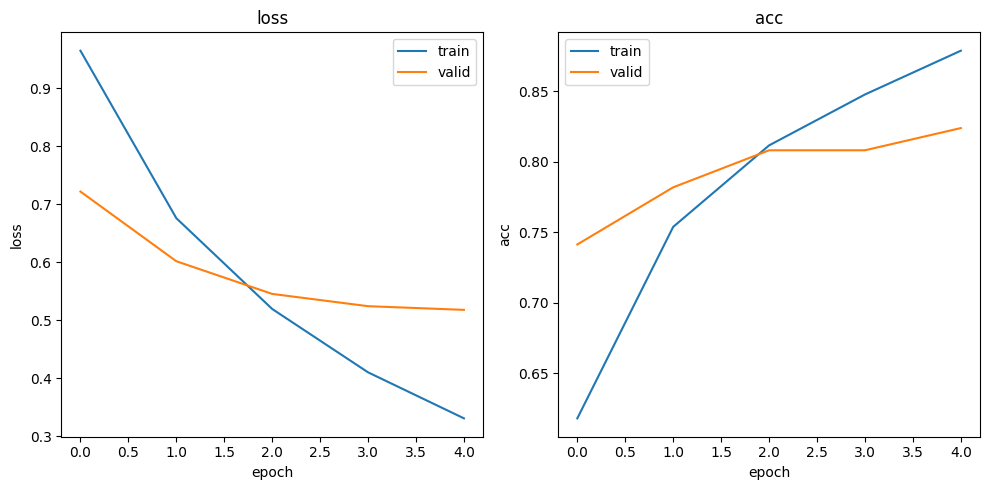

学習データの正解率: 0.9531
検証データの正解率: 0.8238
テストデータの正解率: 0.8358


In [26]:
# モデルの定義
net = CNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, OUT_CHANNELS, KERNEL_HEIGHTS, STRIDE, PADDING, emb_weights=weights)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

num_epochs = 5
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss, label='train')
ax[0].plot(epochs, valid_loss, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc, label='train')
ax[1].plot(epochs, valid_acc, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig87.png')
plt.show()

acc_train = calc_acc(net, train_dataloader)
acc_valid = calc_acc(net, valid_dataloader)
acc_test = calc_acc(net, test_dataloader)
print('学習データの正解率: {:.4f}'.format(acc_train))
print('検証データの正解率: {:.4f}'.format(acc_valid))
print('テストデータの正解率: {:.4f}'.format(acc_test))

# 88. パラメータチューニング

問題85や問題87のコードを改変し，ニューラルネットワークの形状やハイパーパラメータを調整しながら，高性能なカテゴリ分類器を構築せよ．

Epoch 1 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.72it/s]


train Loss: 1.0471, Acc: 0.5909


100%|██████████| 21/21 [00:00<00:00, 33.15it/s]


val Loss: 0.8949, Acc: 0.6934
Epoch 2 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.05it/s]


train Loss: 0.7856, Acc: 0.7268


100%|██████████| 21/21 [00:00<00:00, 23.56it/s]


val Loss: 0.7133, Acc: 0.7474
Epoch 3 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 18.23it/s]


train Loss: 0.6067, Acc: 0.7884


100%|██████████| 21/21 [00:00<00:00, 33.36it/s]


val Loss: 0.6145, Acc: 0.7916
Epoch 4 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.02it/s]


train Loss: 0.4805, Acc: 0.8376


100%|██████████| 21/21 [00:00<00:00, 32.67it/s]


val Loss: 0.5575, Acc: 0.8058
Epoch 5 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.92it/s]


train Loss: 0.3882, Acc: 0.8761


100%|██████████| 21/21 [00:00<00:00, 23.62it/s]


val Loss: 0.5128, Acc: 0.8208
Epoch 6 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.68it/s]


train Loss: 0.3146, Acc: 0.9044


100%|██████████| 21/21 [00:00<00:00, 33.75it/s]


val Loss: 0.4947, Acc: 0.8306
Epoch 7 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.22it/s]


train Loss: 0.2585, Acc: 0.9261


100%|██████████| 21/21 [00:00<00:00, 33.96it/s]


val Loss: 0.4713, Acc: 0.8283
Epoch 8 / 30
--------------------------------------------


100%|██████████| 167/167 [00:12<00:00, 13.25it/s]


train Loss: 0.2124, Acc: 0.9442


100%|██████████| 21/21 [00:00<00:00, 31.16it/s]


val Loss: 0.4559, Acc: 0.8388
Epoch 9 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.89it/s]


train Loss: 0.1721, Acc: 0.9612


100%|██████████| 21/21 [00:00<00:00, 23.52it/s]


val Loss: 0.4421, Acc: 0.8508
Epoch 10 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.56it/s]


train Loss: 0.1450, Acc: 0.9691


100%|██████████| 21/21 [00:00<00:00, 34.09it/s]


val Loss: 0.4369, Acc: 0.8441
Epoch 11 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.89it/s]


train Loss: 0.1210, Acc: 0.9766


100%|██████████| 21/21 [00:00<00:00, 33.96it/s]


val Loss: 0.4317, Acc: 0.8403
Epoch 12 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.90it/s]


train Loss: 0.1004, Acc: 0.9824


100%|██████████| 21/21 [00:00<00:00, 33.34it/s]


val Loss: 0.4302, Acc: 0.8531
Epoch 13 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.81it/s]


train Loss: 0.0857, Acc: 0.9870


100%|██████████| 21/21 [00:00<00:00, 33.43it/s]


val Loss: 0.4330, Acc: 0.8531
Epoch 14 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.90it/s]


train Loss: 0.0717, Acc: 0.9900


100%|██████████| 21/21 [00:00<00:00, 33.64it/s]


val Loss: 0.4317, Acc: 0.8561
Epoch 15 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.95it/s]


train Loss: 0.0627, Acc: 0.9915


100%|██████████| 21/21 [00:00<00:00, 33.58it/s]


val Loss: 0.4435, Acc: 0.8598
Epoch 16 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.31it/s]


train Loss: 0.0545, Acc: 0.9932


100%|██████████| 21/21 [00:00<00:00, 23.77it/s]


val Loss: 0.4328, Acc: 0.8561
Epoch 17 / 30
--------------------------------------------


100%|██████████| 167/167 [00:10<00:00, 15.57it/s]


train Loss: 0.0467, Acc: 0.9949


100%|██████████| 21/21 [00:00<00:00, 33.36it/s]


val Loss: 0.4384, Acc: 0.8636
Epoch 18 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.94it/s]


train Loss: 0.0439, Acc: 0.9943


100%|██████████| 21/21 [00:00<00:00, 34.03it/s]


val Loss: 0.4354, Acc: 0.8606
Epoch 19 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.93it/s]


train Loss: 0.0380, Acc: 0.9954


100%|██████████| 21/21 [00:00<00:00, 33.54it/s]


val Loss: 0.4423, Acc: 0.8613
Epoch 20 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.95it/s]


train Loss: 0.0355, Acc: 0.9957


100%|██████████| 21/21 [00:00<00:00, 33.52it/s]


val Loss: 0.4512, Acc: 0.8613
Epoch 21 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.94it/s]


train Loss: 0.0325, Acc: 0.9956


100%|██████████| 21/21 [00:00<00:00, 33.90it/s]


val Loss: 0.4461, Acc: 0.8606
Epoch 22 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.92it/s]


train Loss: 0.0290, Acc: 0.9962


100%|██████████| 21/21 [00:00<00:00, 33.59it/s]


val Loss: 0.4477, Acc: 0.8606
Epoch 23 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 19.63it/s]


train Loss: 0.0277, Acc: 0.9964


100%|██████████| 21/21 [00:00<00:00, 24.28it/s]


val Loss: 0.4594, Acc: 0.8643
Epoch 24 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.63it/s]


train Loss: 0.0258, Acc: 0.9976


100%|██████████| 21/21 [00:00<00:00, 33.85it/s]


val Loss: 0.4623, Acc: 0.8636
Epoch 25 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.91it/s]


train Loss: 0.0222, Acc: 0.9980


100%|██████████| 21/21 [00:00<00:00, 33.26it/s]


val Loss: 0.4725, Acc: 0.8621
Epoch 26 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 18.49it/s]


train Loss: 0.0225, Acc: 0.9974


100%|██████████| 21/21 [00:00<00:00, 23.85it/s]


val Loss: 0.4679, Acc: 0.8666
Epoch 27 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 18.67it/s]


train Loss: 0.0203, Acc: 0.9978


100%|██████████| 21/21 [00:00<00:00, 33.27it/s]


val Loss: 0.4737, Acc: 0.8606
Epoch 28 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 16.90it/s]


train Loss: 0.0186, Acc: 0.9977


100%|██████████| 21/21 [00:00<00:00, 32.80it/s]


val Loss: 0.4899, Acc: 0.8606
Epoch 29 / 30
--------------------------------------------


100%|██████████| 167/167 [00:09<00:00, 17.19it/s]


train Loss: 0.0204, Acc: 0.9977


100%|██████████| 21/21 [00:00<00:00, 26.99it/s]


val Loss: 0.4689, Acc: 0.8636
Epoch 30 / 30
--------------------------------------------


100%|██████████| 167/167 [00:08<00:00, 20.04it/s]


train Loss: 0.0190, Acc: 0.9973


100%|██████████| 21/21 [00:00<00:00, 33.62it/s]


val Loss: 0.4738, Acc: 0.8606


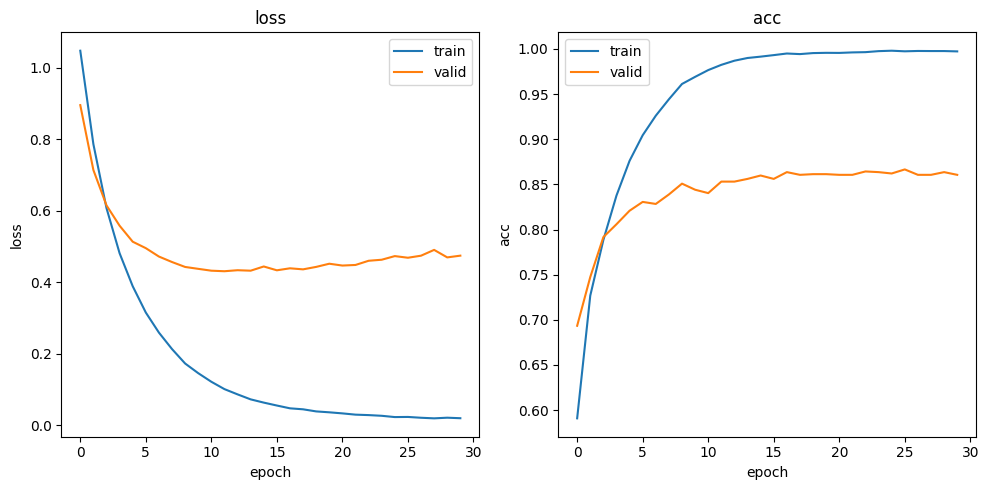

学習データの正解率: 0.9991
検証データの正解率: 0.8606
テストデータの正解率: 0.8771


In [27]:
class CNN(nn.Module):
    def __init__(self, vocab_size, emb_size, padding_idx, output_size, out_channels, kernel_heights, stride, padding, emb_weights=None):
        super().__init__()
        if emb_weights != None:  # 指定があれば埋め込み層の重みをemb_weightsで初期化
            self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
        else:
            self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
        self.conv = nn.Conv2d(1, out_channels, (kernel_heights, emb_size), stride, (padding, 0))
        self.drop = nn.Dropout(0.4)
        self.fc = nn.Linear(out_channels, output_size)

    def forward(self, x):
        emb = self.emb(x).unsqueeze(1)
        conv = self.conv(emb)
        act = F.relu(conv.squeeze(3))
        max_pool = F.max_pool1d(act, act.size()[2])
        logits = self.fc(self.drop(max_pool.squeeze(2)))
        return logits

# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 2
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values())) + 1
OUTPUT_SIZE = 4
OUT_CHANNELS = 500
KERNEL_HEIGHTS = 2
STRIDE = 1
PADDING = 1

# モデルの定義
net = CNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, OUT_CHANNELS, KERNEL_HEIGHTS, STRIDE, PADDING, emb_weights=weights)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)

num_epochs = 30
train_loss, train_acc, valid_loss, valid_acc = train_model(net,
            dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
epochs = np.arange(num_epochs)
ax[0].plot(epochs, train_loss, label='train')
ax[0].plot(epochs, valid_loss, label='valid')
ax[0].set_title('loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(epochs, train_acc, label='train')
ax[1].plot(epochs, valid_acc, label='valid')
ax[1].set_title('acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('fig88.png')
plt.show()

acc_train = calc_acc(net, train_dataloader)
acc_valid = calc_acc(net, valid_dataloader)
acc_test = calc_acc(net, test_dataloader)
print('学習データの正解率: {:.4f}'.format(acc_train))
print('検証データの正解率: {:.4f}'.format(acc_valid))
print('テストデータの正解率: {:.4f}'.format(acc_test))

# 89. 事前学習済み言語モデルからの転移学習

事前学習済み言語モデル（例えばBERTなど）を出発点として，ニュース記事見出しをカテゴリに分類するモデルを構築せよ．

In [28]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00


In [30]:
import os
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from transformers import BertModel, BertTokenizer


def seed_everything(seed=42, use_torch=False):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if use_torch:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True


class TextDataset(Dataset):
    def __init__(self, X, y, tokenizer, max_len, device):
        self.X = X
        self.y = y
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.device = device

    def __len__(self):  # len(Dataset)で返す値を指定
        return len(self.X)

    def __getitem__(self, idx):  # Dataset[index]で返す値を指定
        text = self.X[idx]
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            # pad_to_max_length=True
            padding="max_length",
            truncation=True,
        )
        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]

        return {
            "ids": torch.tensor(ids, device=device),
            "mask": torch.tensor(mask, device=device),
            "labels": torch.tensor([self.y[idx]], device=device),
        }


class BERTClass(nn.Module):
    def __init__(self, drop_rate, output_size):
        super().__init__()
        # outputs = model(ids, mask)
        # にて、下のエラーで落ちる
        # TypeError: dropout(): argument 'input' (position 1) must be Tensor, not str
        # https://github.com/huggingface/transformers/issues/8879#issuecomment-796328753
        # return_dict=Falseを追加したら解決
        # self.bert = BertModel.from_pretrained('bert-base-uncased', return_dict=False)
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.drop = nn.Dropout(drop_rate)
        self.fc = nn.Linear(768, output_size)  # BERTの出力に合わせて768次元を指定
        self.softmax = nn.Softmax(dim=1)

    def forward(self, ids, mask):
        # _, x = self.bert(ids, attention_mask=mask)
        outputs = self.bert(ids, attention_mask=mask)
        _, x = outputs["last_hidden_state"], outputs["pooler_output"]
        # 引数の一つ目は、(batch_size, seq_length=10, 768)のテンソル、last_hidden_state
        # 引数の二つめは、(batch_size, 768)のテンソル、pooler_output
        # これは先頭単語[CLS]を取り出して、BertPoolerにて、同じhiddensize→hiddensizeへと全結合層を通して、その後tanhを通して-1~1にしたもの。
        x = self.drop(x)
        x = self.fc(x)
        x = self.softmax(x)
        return x


def train_fn(model, dataset, device, optimizer, criterion, BATCH_SIZE) -> float:
    """model, loaderを用いて学習を行い、lossを返す"""

    # dataloaderを生成
    loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

    # 学習モードに設定
    model.train()

    train_running_loss = 0.0

    for data in loader:
        # デバイスの指定
        ids = data["ids"].to(device)
        mask = data["mask"].to(device)
        labels = data["labels"].to(device)

        # labelsの次元を(BATCH_SIZE, 1)から(BATCH_SIZE,)に変更
        labels = labels.squeeze(1)

        optimizer.zero_grad()

        outputs = model(ids, mask)
        # dataloader_xでの損失の計算/
        loss = criterion(outputs, labels)
        # 勾配の計算
        loss.backward()
        optimizer.step()

        # 訓練データでの損失の平均を計算する
        train_running_loss += loss.item() / len(loader)

    return train_running_loss


def calculate_loss_and_accuracy(model, dataset, device=None, criterion=None):
    """損失・正解率を計算"""
    # 評価モードに設定
    model.eval()

    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    loss = 0.0
    total = 0
    correct = 0

    with torch.no_grad():
        for data in dataloader:
            # 変数の生成、device送り
            ids = data["ids"].to(device)
            mask = data["mask"].to(device)
            labels = data["labels"].to(device)

            # 順伝播
            outputs = model(ids, mask)

            # labelsの次元を(BATCH_SIZE, 1)から(BATCH_SIZE,)に変更
            labels = labels.squeeze(1)

            # 損失計算
            loss += criterion(outputs, labels).item()

            # 正解率計算
            pred = torch.argmax(outputs, dim=-1)
            total += len(labels)
            correct += (pred == labels).sum().item()

    return loss / len(dataset), correct / total


def make_graph(value_dict: dict, value_name: str, bn: int, method: str) -> None:
    """value_dictに関するgraphを生成し、保存する。"""
    for phase in ["train", "test"]:
        plt.plot(value_dict[phase], label=phase)
    plt.xlabel("epoch")
    plt.ylabel(value_name)
    plt.title(f"{value_name} per epoch at bn{bn}")
    plt.legend()
    plt.savefig(f"{method}_{value_name}_bn{bn}.png")
    plt.close()


if __name__ == "__main__":

    DEBUG = False
    if DEBUG:
        print("DEBUG mode")

    METHOD = "bert"

    # 時間の計測開始
    start_time = time.time()

    # seedの固定
    seed_everything(use_torch=True)



    # deviceの指定
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Use {device}")


    # indexを再設定
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # 計算の短縮
    if DEBUG:
        train = train.sample(1000).reset_index(drop=True)
        test = test.sample(1000).reset_index(drop=True)

    # 正解データの生成
    cat_id_dict = {"b": 0, "t": 1, "e": 2, "m": 3}
    y_train = train["CATEGORY"].map(cat_id_dict)
    y_test = test["CATEGORY"].map(cat_id_dict)

    # tokenizerの読み込み
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    max_len = 10

    # datasetの作成
    dataset_train = TextDataset(train["TITLE"], y_train, tokenizer, max_len, device)
    dataset_test = TextDataset(test["TITLE"], y_test, tokenizer, max_len, device)
    # {'input_ids': [101, 2885, 6561, 24514, 2391, 2006, 8169, 2586, 102, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]}
    # BERTでは、変換の過程で元の文の文頭と文末に特殊区切り文字である[CLS]と[SEP]がそれぞれ挿入されるため、それらも101と102として系列に含まれています。0はパディングを表します。

    # パラメータの設定
    DROP_RATE = 0.4
    OUTPUT_SIZE = 4
    BATCH_SIZE = 32
    NUM_EPOCHS = 30
    if DEBUG:
        NUM_EPOCHS = 2
    LEARNING_RATE = 2e-5

    # モデルの定義
    model = BERTClass(DROP_RATE, OUTPUT_SIZE).to(device)

    # criterion, optimizerの設定
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []

    for epoch in tqdm(range(NUM_EPOCHS)):
        # 学習
        train_running_loss = train_fn(
            model, dataset_train, device, optimizer, criterion, BATCH_SIZE
        )
        print(train_running_loss)

        # 損失と正解率の算出
        train_loss, train_acc = calculate_loss_and_accuracy(
            model, dataset_train, device, criterion
        )
        test_loss, test_acc = calculate_loss_and_accuracy(
            model, dataset_test, device, criterion
        )

        train_losses.append(train_loss)
        train_accs.append(train_acc)

        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # 20epoch毎にチェックポイントを生成
        if epoch % 20 == 0:
            torch.save(model.state_dict(), f"89_{METHOD}_epoch{epoch}.pth")
            torch.save(
                optimizer.state_dict(),
                f"89_{METHOD}_optimizer_epoch{epoch}.pth",
            )

    # グラフへのプロット
    losses = {"train": train_losses, "test": test_losses}

    accs = {"train": train_accs, "test": test_accs}

    make_graph(losses, "losses", bn=BATCH_SIZE, method=METHOD)
    make_graph(accs, "accs", bn=BATCH_SIZE, method=METHOD)

    print(f"train_acc: {train_acc: .4f}")
    print(f"test_acc: {test_acc: .4f}")

    # 計測終了
    elapsed_time = time.time() - start_time
    print(f"elapsed_time:{elapsed_time:.0f}[sec]")

Use cpu


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/30 [02:05<?, ?it/s]


KeyboardInterrupt: ignored